<a href="https://colab.research.google.com/github/sonjoy1s/kaggle_project/blob/main/Exam_Score_Prediction_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
data = "/content/Exam_Score_Prediction.csv"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(data)
df.head()

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   student_id        20000 non-null  int64  
 1   age               20000 non-null  int64  
 2   gender            20000 non-null  object 
 3   course            20000 non-null  object 
 4   study_hours       20000 non-null  float64
 5   class_attendance  20000 non-null  float64
 6   internet_access   20000 non-null  object 
 7   sleep_hours       20000 non-null  float64
 8   sleep_quality     20000 non-null  object 
 9   study_method      20000 non-null  object 
 10  facility_rating   20000 non-null  object 
 11  exam_difficulty   20000 non-null  object 
 12  exam_score        20000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 2.0+ MB


In [5]:
df.columns

Index(['student_id', 'age', 'gender', 'course', 'study_hours',
       'class_attendance', 'internet_access', 'sleep_hours', 'sleep_quality',
       'study_method', 'facility_rating', 'exam_difficulty', 'exam_score'],
      dtype='object')

In [6]:
numerical_cols =['age','study_hours','class_attendance',
                 'sleep_hours',]

categorical_cols=['gender', 'course','internet_access','sleep_hours', 'sleep_quality',
                 'study_method', 'facility_rating', 'exam_difficulty']

target_col ="exam_score"

In [7]:
df.nunique()

,0
student_id,20000
age,8
gender,3
course,7
study_hours,784
class_attendance,589
internet_access,2
sleep_hours,59
sleep_quality,3
study_method,5


In [8]:
df.isna().sum()

,0
student_id,0
age,0
gender,0
course,0
study_hours,0
class_attendance,0
internet_access,0
sleep_hours,0
sleep_quality,0
study_method,0


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
student_id,20000.0,10000.504600,5773.654959,1.000,5000.75,10000.50,15000.25,20001.00
age,20000.0,20.473300,2.284458,17.000,18.00,20.00,22.00,24.00
study_hours,20000.0,4.007604,2.308313,0.080,2.00,4.04,6.00,7.91
class_attendance,20000.0,70.017365,17.282262,40.600,55.10,69.90,85.00,99.40
sleep_hours,20000.0,7.008560,1.732090,4.100,5.50,7.00,8.50,9.90
exam_score,20000.0,62.513225,18.908491,19.599,48.80,62.60,76.30,100.00


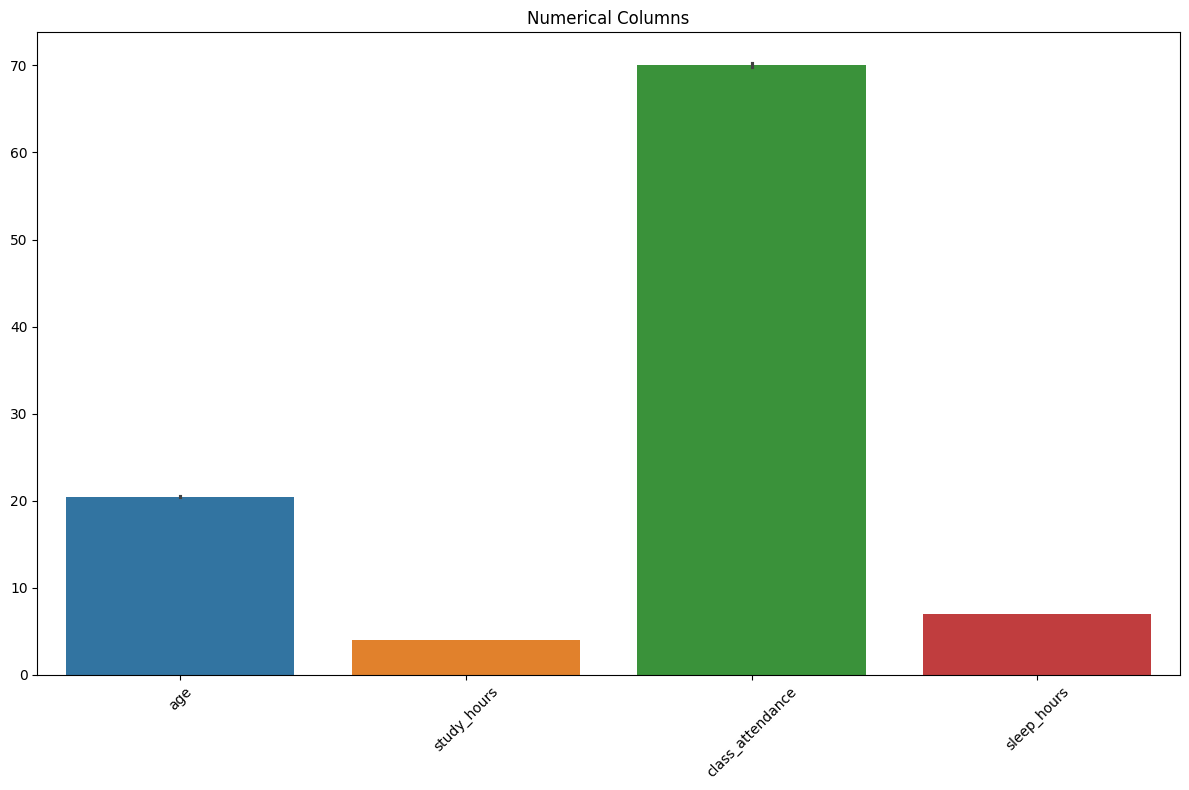

In [10]:
plt.figure(figsize=(12,8))
sns.barplot(df[numerical_cols])
plt.xticks(rotation=45)
plt.title('Numerical Columns')
#plt.legend()
plt.tight_layout()
plt.show()

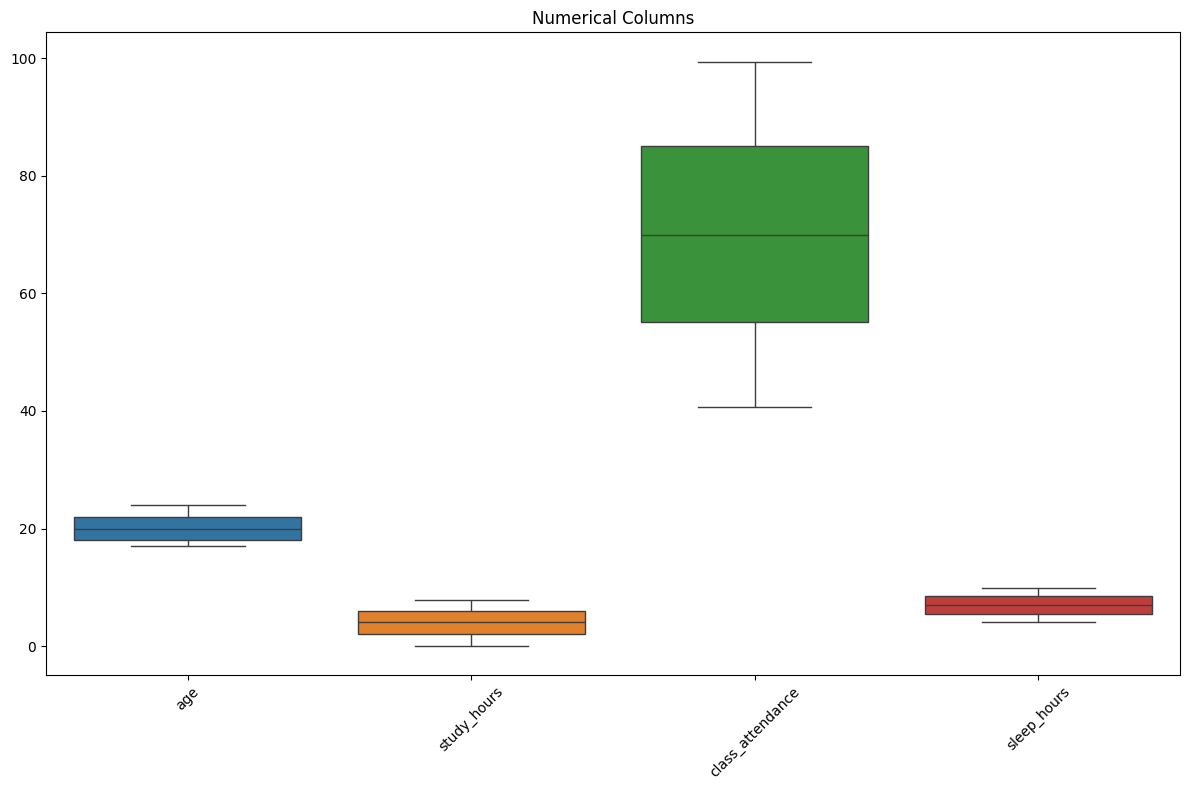

In [11]:
plt.figure(figsize=(12,8))
sns.boxplot(df[numerical_cols])
plt.xticks(rotation=45)
plt.title('Numerical Columns')
plt.tight_layout()
plt.show()

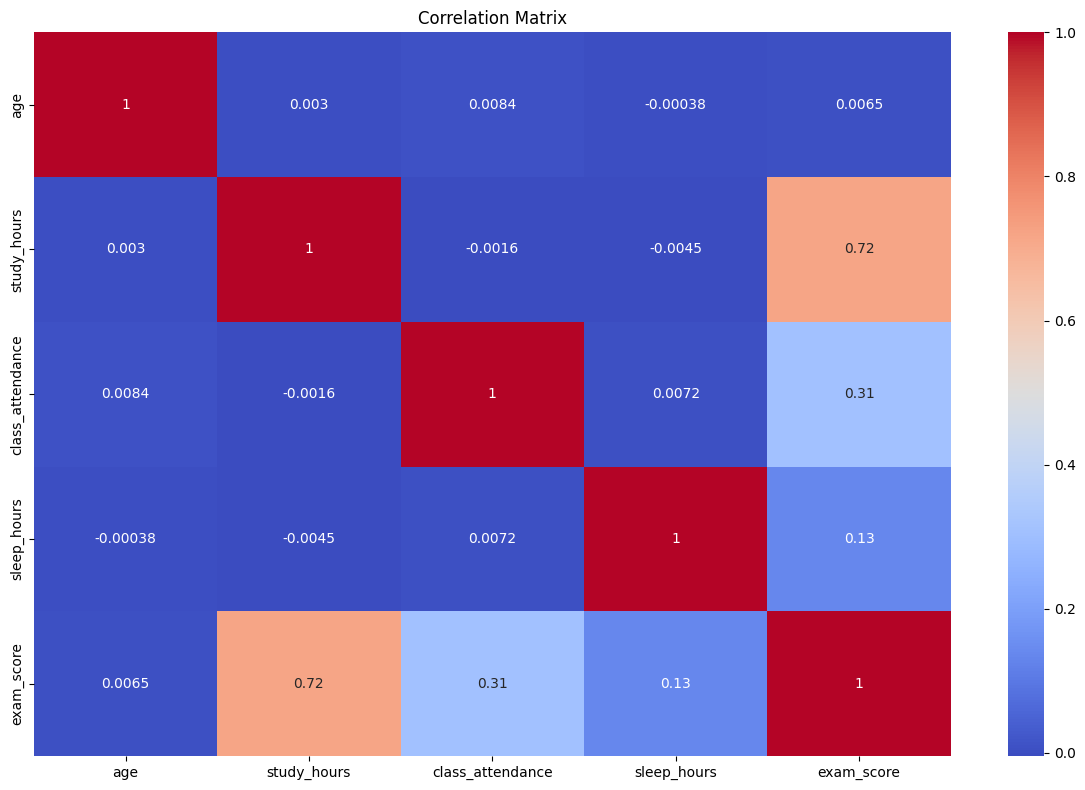

In [12]:
plt.figure(figsize=(12,8))
corr_matrix = df[numerical_cols + [target_col]].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

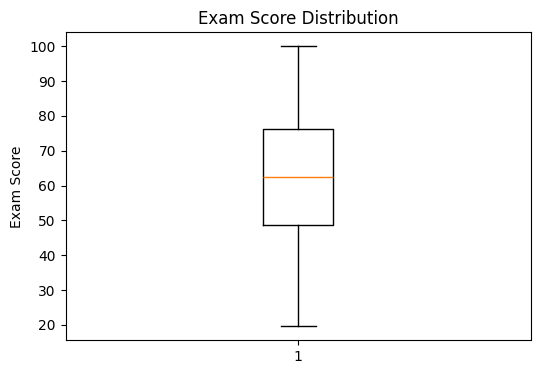

In [13]:
plt.figure(figsize=(6,4))
plt.boxplot(df[target_col])
plt.title('Exam Score Distribution')
plt.ylabel('Exam Score')
plt.show()

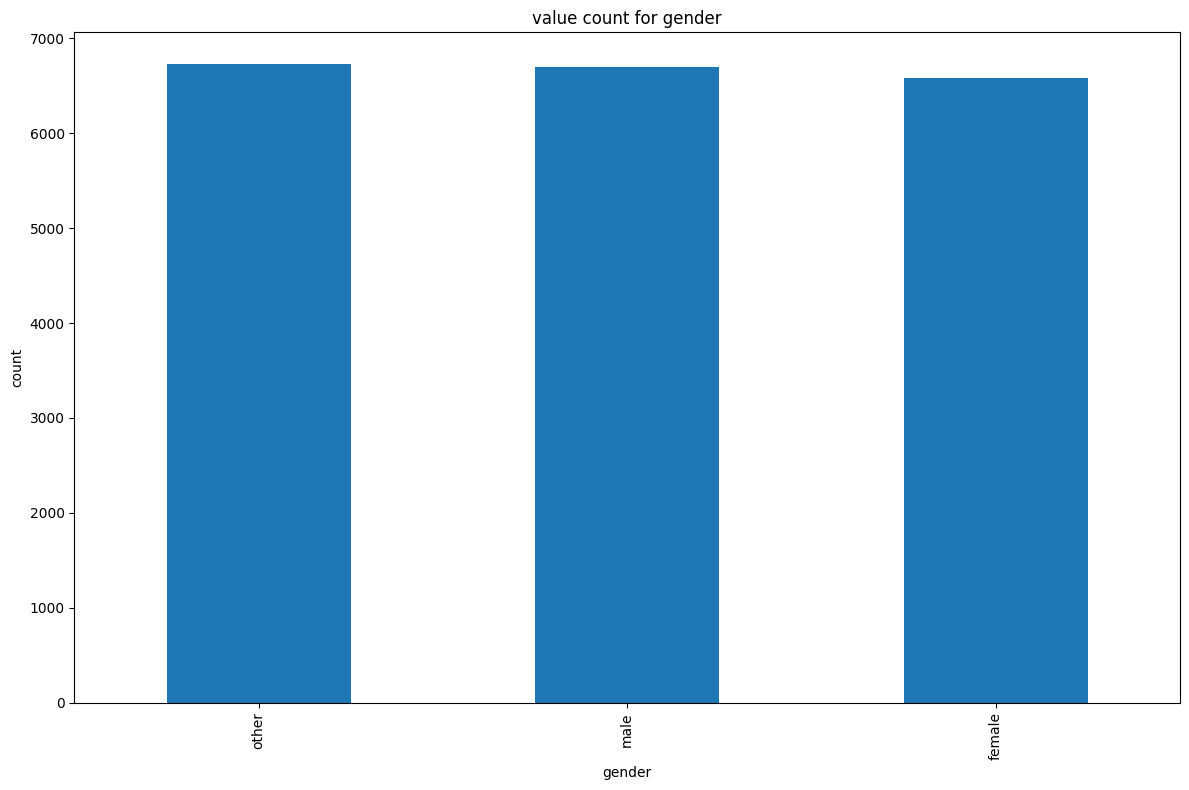

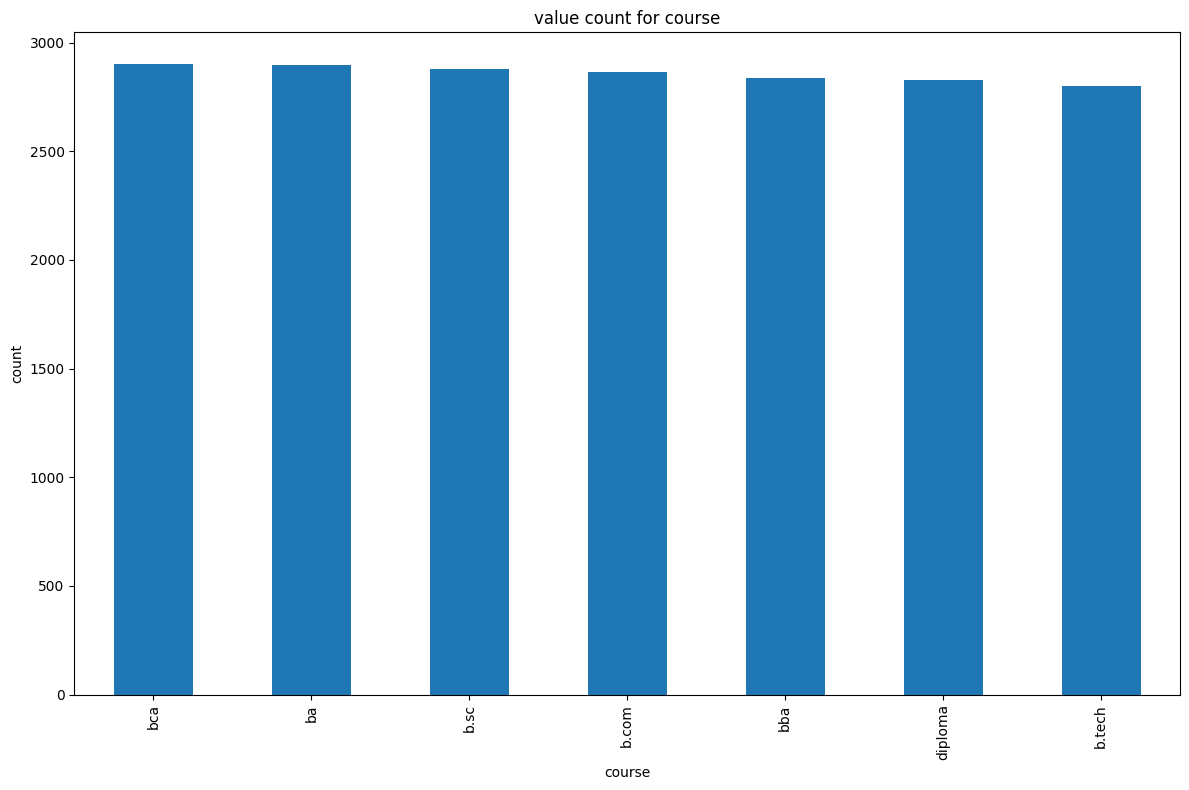

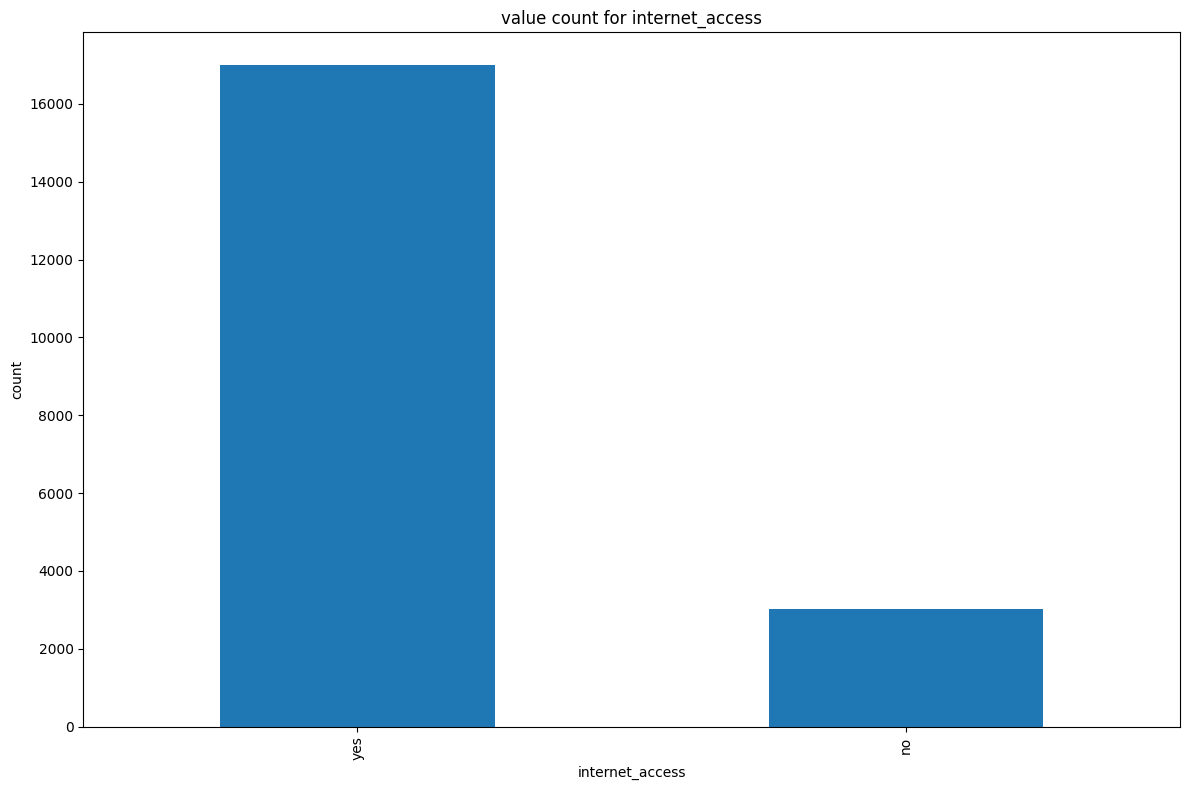

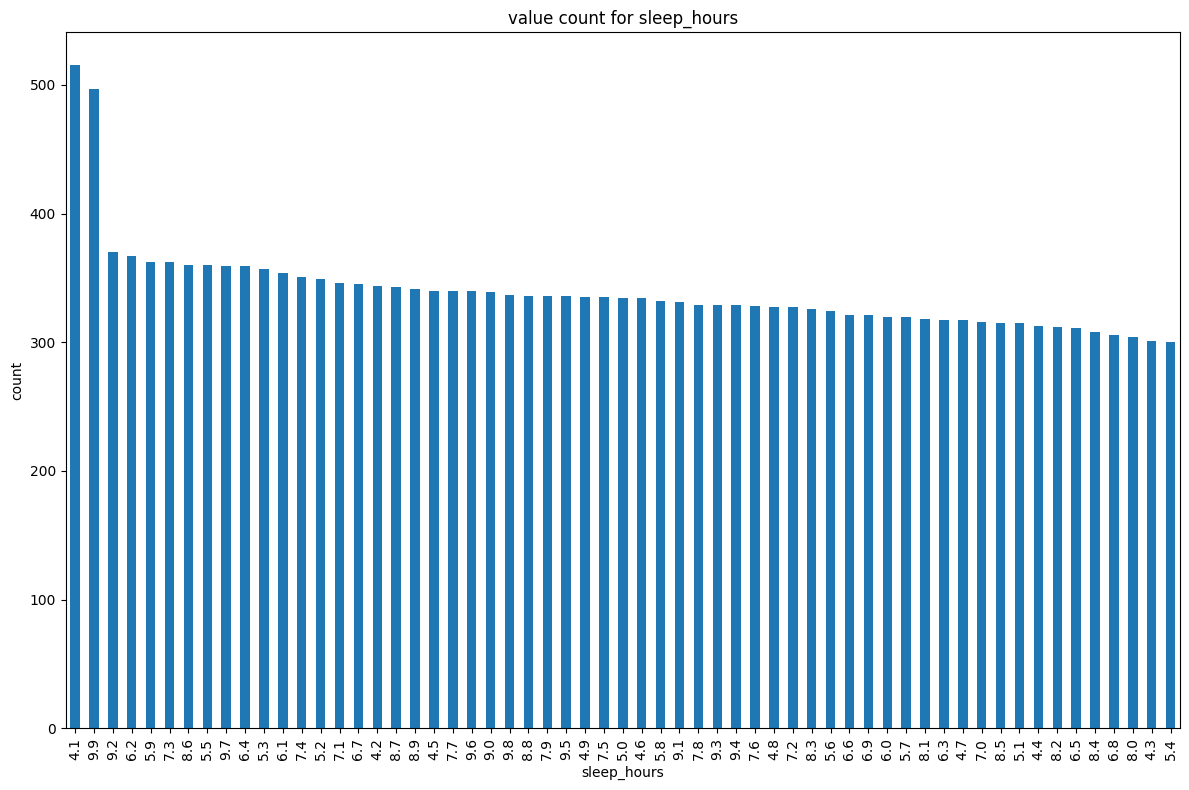

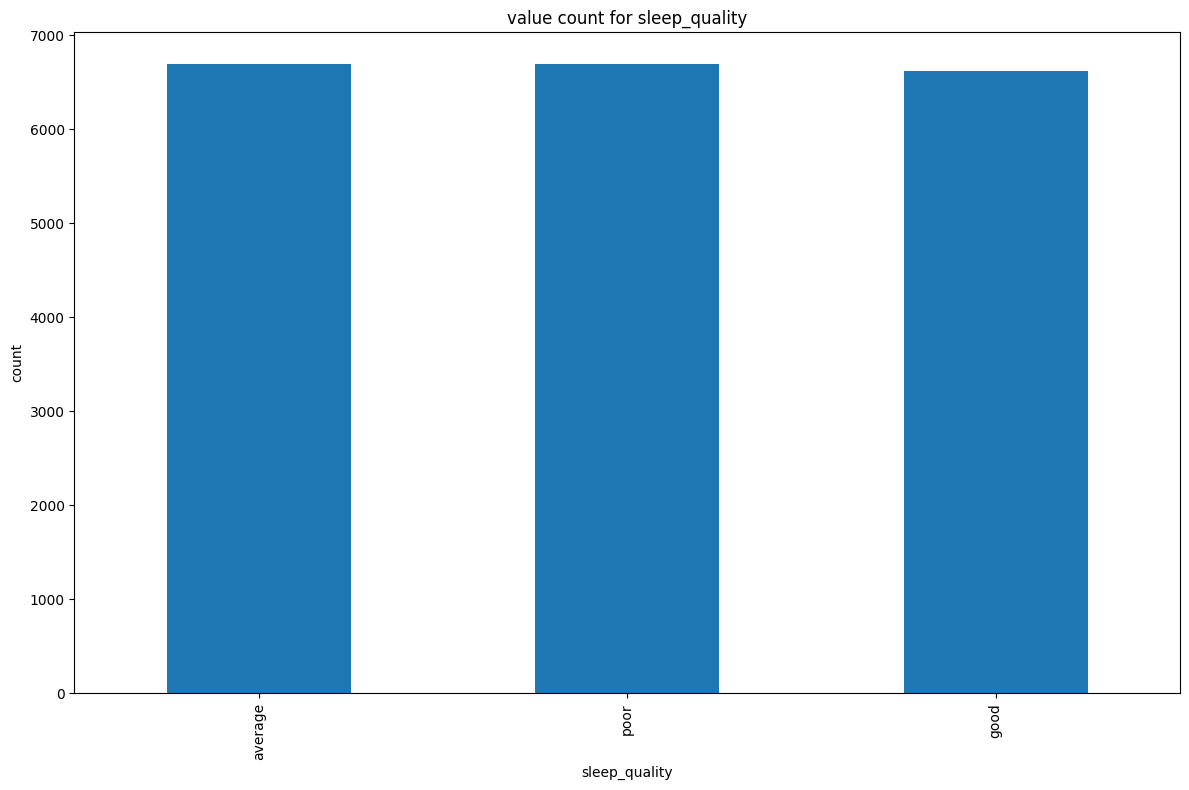

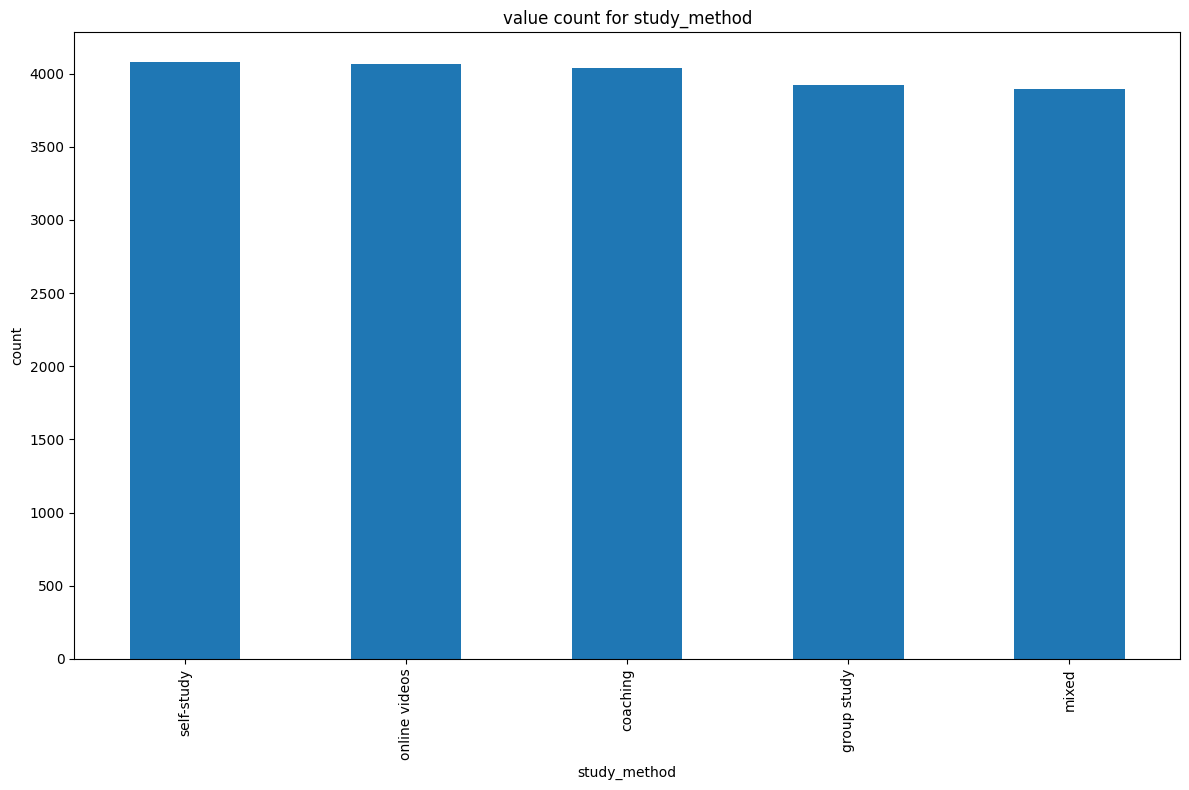

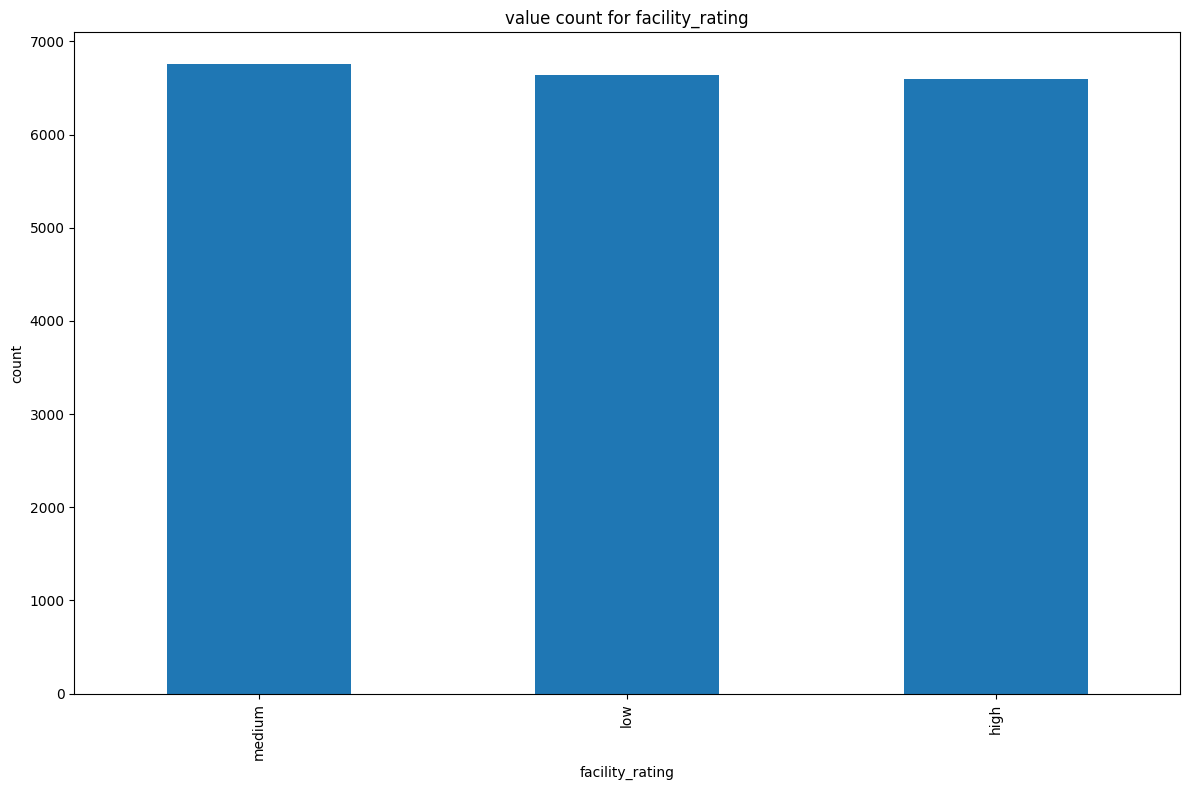

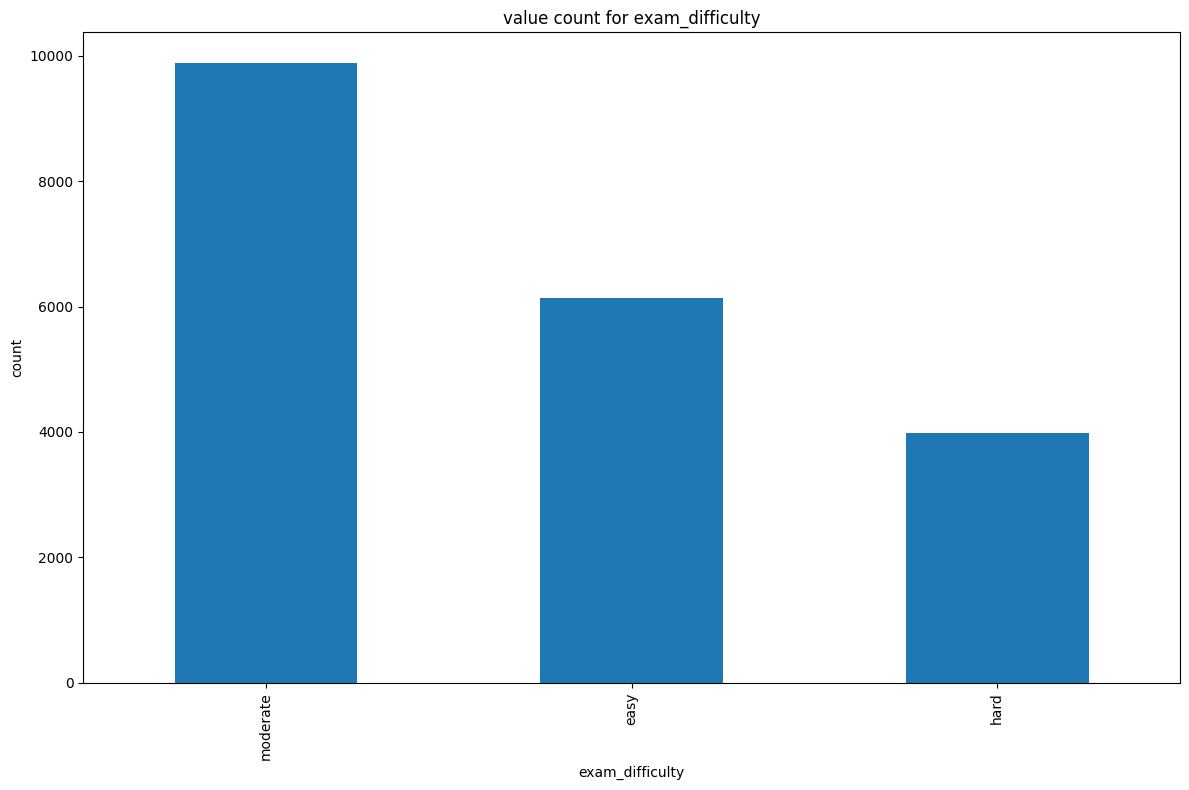

In [14]:
for c in categorical_cols:
  plt.figure(figsize=(12,8))
  df[c].value_counts().plot(kind='bar')
  plt.title(f"value count for {c}")
  plt.ylabel("count")
  plt.tight_layout()
  plt.show()